### 作業目的: 了解何謂Bias-Variance Tradeoff

### Q1: 一般模型誤差可拆為三部分，這三部分的誤差分別是？

Answer: bias/ variance/ irreducible error
### bias 
是模型還沒有訓練到收斂的偏差，通常train跟test都有很高的誤差就是bias引起的（underfit）
### variance 
是模型overfit之後產生的誤差，因為太努力想要描述好training的特徵，然而要去逼近training的所有描述點時，所使用過於高維的表達式可能就會有曲線震盪到很偏離的區域（但有符合training)
### irreducible error
可能源自於背景資料的不乾淨，離群值，或是異類，這些偏離的資料除非overfit，否則是無法匹配到的。這就是很難分離乾淨的error

### Q2: 請解釋何謂Bias-Variance Tradeoff
<img src='bias_variance_tradeoff.png' style='width:500px'>
Answer:

### Answer
當今天訓練在進行的過程會先從bias很高的狀況開始慢慢收斂，隨著使用者餵資料給模型，bias開始慢慢下降，而training的資料重複用某種規律出現後，model就會仰賴他僅知道的資料，如果那些資料的分佈是模型可以用冗餘的高維項去匹配到的時候 可能就會有模型過擬和的問題overfitting,而variance就會慢慢提升。這就是bias variance trade-off, 會有一個比較理想的模型完成訓練的區間，但是沒有一定好的方式

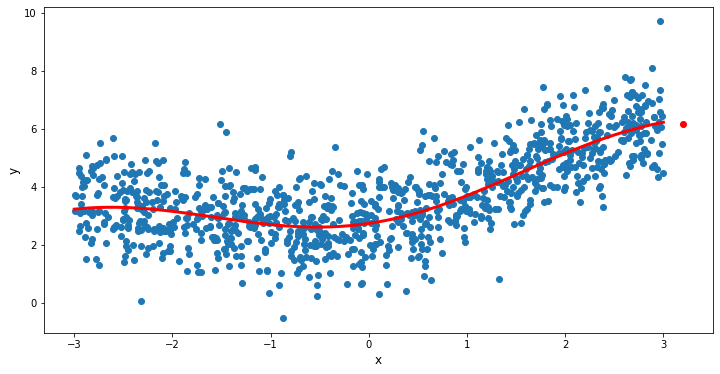

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return .5 * x + np.sqrt(np.max(x, 0)) - np.cos(x) + 2

N = 1000
sigma_epsilon = 1
x_max = 3
x_test = 3.2
x = x_max * (2 * np.random.rand(N) - 1)
epsilon = sigma_epsilon * np.random.randn(N)

y = f(x) + epsilon
y_test = f(x_test) + sigma_epsilon * np.random.randn()

plt.figure(figsize=(12, 6))
x_range = np.linspace(-x_max, x_max, 1000)
plt.scatter(x, y)
plt.plot(x_range, f(x_range), 'r', linewidth=3.0)
plt.scatter(x_test, y_test, c='r')
plt.xlabel('x', size=12)
plt.ylabel('y', size=12)
plt.xticks(np.arange(-x_max, x_max + 1))
plt.show()

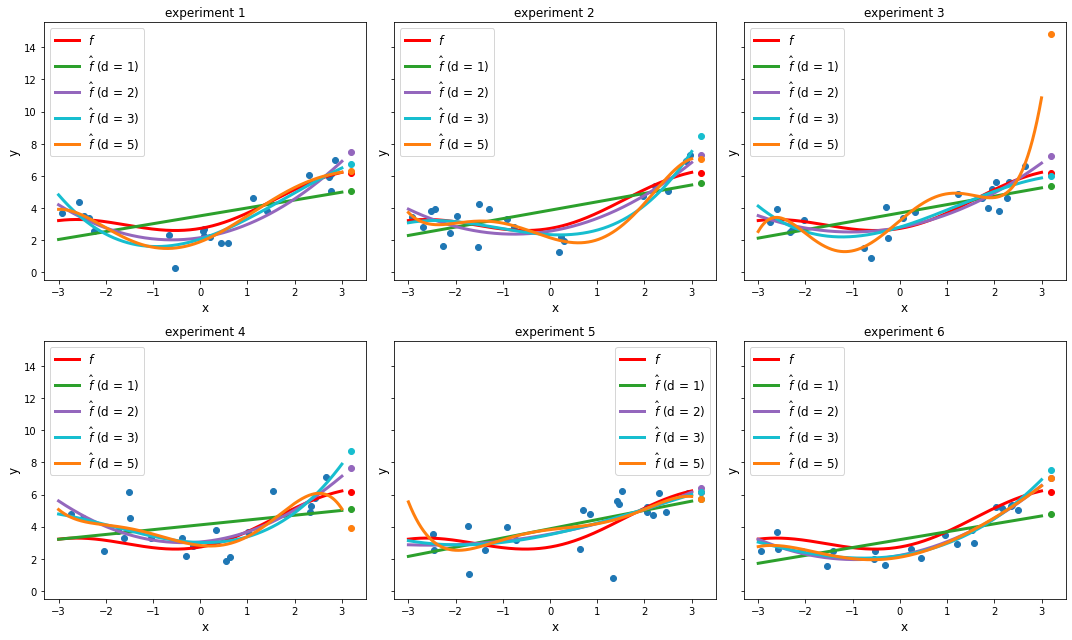

In [6]:
def f_hat(x, w):
    d = len(w) - 1
    return np.sum(w * np.power(x, np.expand_dims(np.arange(d, -1, -1), 1)).T, 1)

n = int(.02 * N)
x_test = 3.2
x_range = np.linspace(-x_max, x_max, 1000)
colors = np.array(['tab:green', 'tab:purple', 'tab:cyan', 'tab:orange'])
d_arr = [1, 2, 3, 5]

cnt = 1
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(15, 9))
for i in range(2):
    for j in range(3):
        idx = np.random.permutation(N)[:n]
        x_train, y_train = x[idx], y[idx]
        
        w = []
        for d in d_arr:
            w.append(np.polyfit(x_train, y_train, d))
                
        axs[i, j].scatter(x_train, y_train)
        axs[i, j].plot(x_range, f(x_range), 'r', linewidth=3.0)
        for k in range(len(w)):
            axs[i, j].plot(x_range, f_hat(x_range, w[k]), colors[k], linewidth=3.0)
            
        axs[i, j].scatter(x_test, y_test, c='r')
        for k in range(len(w)):
            axs[i, j].scatter(x_test, f_hat(x_test, w[k]), c=colors[k])
                
        axs[i, j].set_xlabel('x', size=12)
        axs[i, j].set_ylabel('y', size=12)
        axs[i, j].legend([r'$f$', r'$\hat{f}$ (d = 1)', r'$\hat{f}$ (d = 2)', 
                          r'$\hat{f}$ (d = 3)', r'$\hat{f}$ (d = 5)'], fontsize=12)
        axs[i, j].title.set_text('experiment {}'.format(cnt))
        cnt += 1
plt.tight_layout()
plt.show()

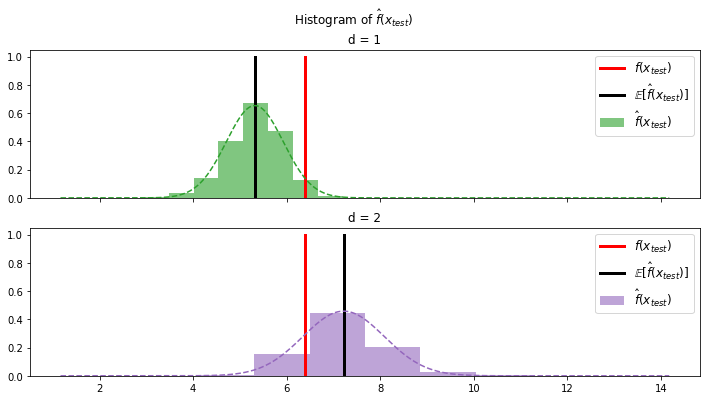

In [7]:
R = 10000
d_arr = [1, 2, 3, 5]
y_hat_test = np.zeros((len(d_arr), R))

for r in range(R):
    n = int(.02 * N)
    idx = np.random.permutation(N)[:n]
    x_train, y_train = x[idx], y[idx]
    
    for k in range(len(d_arr)):
        d = d_arr[k]
        w = np.polyfit(x_train, y_train, d)
        y_hat_test[k, r] = f_hat(x_test, w)

y_hat_test_mean = np.mean(y_hat_test, 1)
y_hat_test_std = np.std(y_hat_test, 1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12, 6))
for k in range(2):
    axs[k].hist(y_hat_test[k], density=True, color=colors[k], alpha=0.6)             
    xlim = axs[k].get_xlim()
    axs[k].plot([f(x_test), f(x_test)], [0, 1], 'r', linewidth=3.0)
    axs[k].plot([y_hat_test_mean[k], y_hat_test_mean[k]], [0, 1], c='k', linewidth=3.0)
    axs[k].title.set_text('d = {}'.format(d_arr[k]))
    axs[k].legend([r'$f(x_{test})$', r'$\mathbb{E}[\hat{f}(x_{test})]$', r'$\hat{f}(x_{test})$'], fontsize=12)
    
for k in range(2):
    x_range = np.linspace(xlim[0], xlim[1], 1000)
    axs[k].plot(x_range, stats.norm.pdf(x_range, y_hat_test_mean[k], y_hat_test_std[k]), color=colors[k], ls='--')
    
plt.suptitle(r'Histogram of $\hat{f}(x_{test})$', size=12)
plt.show()

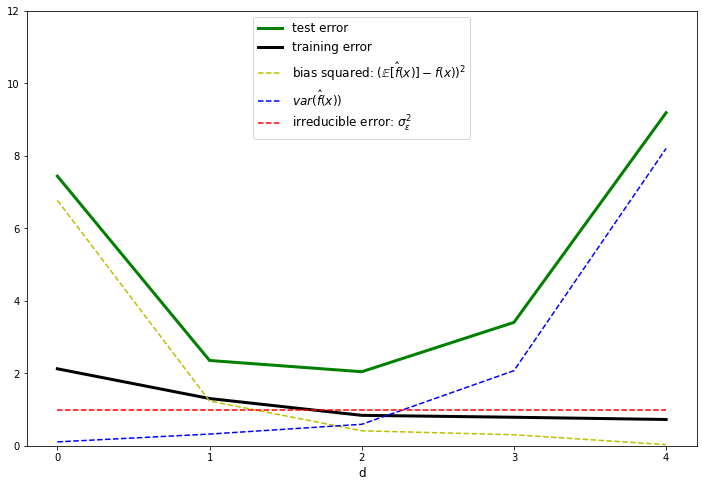

In [8]:
R = 10000
n = int(.02 * N)
n_test = 1000
d_arr = np.arange(5)

x_test = x_max + np.random.rand(n_test) - .5
epsilon = sigma_epsilon * np.random.randn(n_test)
y_test = f(x_test) + epsilon

train_squared_error = np.zeros((len(d_arr), R))
y_hat_test = np.zeros((len(d_arr), R, n_test))
for r in range(R):
    n = int(.02 * N)
    idx = np.random.permutation(N)[:n]
    x_train, y_train = x[idx], y[idx]
    for k in range(len(d_arr)):
        d = d_arr[k]
        w = np.polyfit(x_train, y_train, d)
        train_squared_error[k, r] = np.mean((y_train - f_hat(x_train, w)) ** 2)
        y_hat_test[k, r, :] = f_hat(x_test, w)

test_squared_error = np.mean((y_hat_test - y_test) ** 2, 1)
bias_squared = (np.mean(y_hat_test, 1) - f(x_test)) ** 2
var_y_hat_test = np.var(y_hat_test, 1)

plt.figure(figsize=(12, 8))
plt.plot(d_arr, np.mean(test_squared_error, 1), 'g', linewidth=3.0)
plt.plot(d_arr, np.mean(train_squared_error, 1), 'k', linewidth=3.0)
plt.plot(d_arr, np.mean(bias_squared, 1), 'y--')
plt.plot(d_arr, np.mean(var_y_hat_test, 1), 'b--')
plt.plot(d_arr, (sigma_epsilon ** 2) * np.ones_like(d_arr), 'r--')
# plt.plot(d_arr, np.mean(bias_squared + var_y_hat_test + sigma_epsilon ** 2, 1), 'm--')
plt.xticks(d_arr)
plt.xlabel('d', size=12)
plt.legend(['test error', 'training error', r'bias squared: $(\mathbb{E}[\hat{f}(x)] - f(x))^2$',
            r'$var(\hat{f}(x))$', r'irreducible error: $\sigma_\epsilon^2$'], loc='upper center', fontsize=12)
plt.ylim([0, 12])
plt.show()